In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Load the data
data = pd.read_csv('dt.csv')  
# Drop rows with missing values
data = data.dropna(subset=['articles', 'Sentiment', 'Ratio', 'label'])
data['Ratio'] = data['Ratio'].astype(str)
X = data['articles'] + ' ' + data['Sentiment'] + ' ' + data['Ratio']
y = data['label']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Train SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for SVM
svm_model.fit(X_train_tfidf, y_train)
# Predictions
y_pred = svm_model.predict(X_test_tfidf)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[494 106]
 [ 86 549]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       600
           1       0.84      0.86      0.85       635

    accuracy                           0.84      1235
   macro avg       0.84      0.84      0.84      1235
weighted avg       0.84      0.84      0.84      1235



In [3]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

#Printing classification report
print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=['fake', 'real'])
print(report)

#Calculating and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

#Printing precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

Classification Report:
              precision    recall  f1-score   support

        fake       0.85      0.82      0.84       600
        real       0.84      0.86      0.85       635

    accuracy                           0.84      1235
   macro avg       0.84      0.84      0.84      1235
weighted avg       0.84      0.84      0.84      1235

Accuracy: 84.45%
Precision (Fake): 85.17%
Precision (Real): 83.82%
Recall (Fake): 82.33%
Recall (Real): 86.46%
F1-Score (Fake): 83.73%
F1-Score (Real): 85.12%


Précision d'entraînement: 0.9827935222672065
Précision de validation: 0.8445344129554656


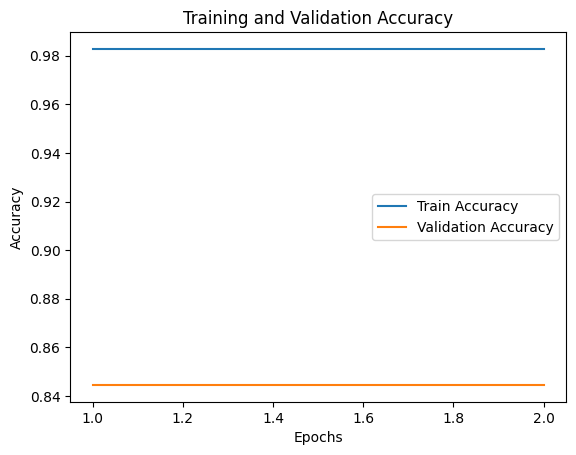

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer la précision d'entraînement
train_accuracy = svm_model.score(X_train_tfidf, y_train)

# Calculer la précision de validation
val_accuracy = svm_model.score(X_test_tfidf, y_test)

print("Précision d'entraînement:", train_accuracy)
print("Précision de validation:", val_accuracy)

# Plot de l'entraînement et de la validation de la précision
epochs = np.arange(1, 3)  # Nous avons deux époques (entraînement et validation)
plt.plot(epochs, [train_accuracy] * len(epochs), label='Train Accuracy')
plt.plot(epochs, [val_accuracy] * len(epochs), label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
